In [14]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df_item_lookup = pd.read_csv("item_lookup.csv", encoding='latin-1')
df_fetch_requests = pd.read_csv("lou_mes_retrieval_requests.csv")
df_workbench_jobs = pd.read_csv("lou_workbench_jobs.csv")

In [3]:
df_fetch_requests.head()

,ORG,Line,SKU,FROM_LOCATION,TO_LOCATION,INSERT_DTTM,COMPLETE_DTTM,TRANSPORT_ORDER_TYPE,Duration_in_Minutes
0,LOU,LOU1,SHV02RED0540DRN1,RDD.SSR.031.01.05,RDD.RAW.HOFF.L1,2024-02-15 05:04:41,2024-02-15 05:13:52,Retrieval Request from Mes,9.183333
1,LOU,LOU1,LKRG05DRNNV04RAI,RDD.RSR.N.07.01,RDD.RAW.HOFF.L1,2024-02-15 07:56:19,2024-02-15 08:05:24,Retrieval Request from Mes,9.083333
2,LOU,LOU1,SHV05GRV0540DMN,RDD.RSR.N.09.05,RDD.RAW.HOFF.L1,2024-02-15 10:52:02,2024-02-15 11:06:17,Retrieval Request from Mes,14.250000
3,LOU,LOU5,RM01805,RDD.SSR.014.01.04,RDD.RAW.HOFF.L5,2024-02-15 11:24:36,2024-02-15 12:28:18,Retrieval Request from Mes,63.700000
4,LOU,LOU1,SHV02RED0540DRN1,RDD.SSR.041.01.05,RDD.RAW.HOFF.L1,2024-02-15 12:55:23,2024-02-15 13:17:23,Retrieval Request from Mes,22.000000


In [4]:
df_fetch_requests.head()

,ORG,Line,SKU,FROM_LOCATION,TO_LOCATION,INSERT_DTTM,COMPLETE_DTTM,TRANSPORT_ORDER_TYPE,Duration_in_Minutes
0,LOU,LOU1,SHV02RED0540DRN1,RDD.SSR.031.01.05,RDD.RAW.HOFF.L1,2024-02-15 05:04:41,2024-02-15 05:13:52,Retrieval Request from Mes,9.183333
1,LOU,LOU1,LKRG05DRNNV04RAI,RDD.RSR.N.07.01,RDD.RAW.HOFF.L1,2024-02-15 07:56:19,2024-02-15 08:05:24,Retrieval Request from Mes,9.083333
2,LOU,LOU1,SHV05GRV0540DMN,RDD.RSR.N.09.05,RDD.RAW.HOFF.L1,2024-02-15 10:52:02,2024-02-15 11:06:17,Retrieval Request from Mes,14.250000
3,LOU,LOU5,RM01805,RDD.SSR.014.01.04,RDD.RAW.HOFF.L5,2024-02-15 11:24:36,2024-02-15 12:28:18,Retrieval Request from Mes,63.700000
4,LOU,LOU1,SHV02RED0540DRN1,RDD.SSR.041.01.05,RDD.RAW.HOFF.L1,2024-02-15 12:55:23,2024-02-15 13:17:23,Retrieval Request from Mes,22.000000


In [5]:
df_item_lookup.head()

,item,item_type,description
0,RM02296,LABL,RM02296 Label: Sparkling Ice 17oz Grape Raspbe...
1,FLAPHYWHTCLDV01,INGR,Flavors: White Cloud FASN292 (40LB Pail)
2,SHV02GGZ0524DRN,SHRF,Shrink Film:Northgate Gonzalez DR 0.5L24pk Nes...
3,CTJOJ8Z12PBAHAMV01,CORR,Corrugate: Joint Juice 8oz 12pk Blueberry Acai...
4,LCKK10ZBBS19V01CV,LABL,Label: Kids' Koolers 10oz Berry Blue F Cut-Sta...


In [6]:
df_workbench_jobs.head()

,ORG,PROD_LINE,JOB_NUMBER,ITEM_NUMBER,ITEM_DESCRIPTION,QUANTITY,ACTUAL_QUANTITY,ACTUAL_START_TIME,PLANNED_START_TIME,UOM
0,LOU,LOU1,L00884024,MMK05L40PDMCHNR02,05L.DM.MEMBER'S MARK 20% RPET.40P.N.48.CH,25344.0,25386,2024-01-02 13:37:50,2023-12-31 01:00:00,case
1,LOU,LOU3,2605949_72,DSN05L24PDMRTN,707303 05L.DM.DASANI.24P.N.84.RT,57624.0,53915,2024-01-03 10:49:45,2024-01-02 15:00:00,case
2,LOU,LOU2,L00885584,NDW05L24PDRCHN84,05L.DR.NIAGARA NEW FILM.24P.N.84.CH,5124.0,5128,2024-01-02 15:37:50,2024-01-02 20:32:00,case
3,LOU,LOU2,L00886616,CRF05L24PDRCHN,05L.DR.CRYSTAL FALLS.24P.N.84.CH,7952.0,7982,2024-01-02 18:03:23,2024-01-02 20:35:00,case
4,LOU,LOU2,L00885000,NDW05L24PDRPBN84,05L.DR.NIAGARA NEW FILM.24P.N.84.PB,14220.0,14227,2024-01-02 20:58:45,2024-01-03 01:40:00,case


In [7]:
df_fetch_requests = pd.merge(df_item_lookup, df_fetch_requests, left_on='item', right_on='SKU', how='inner')

In [8]:
df_fetch_requests.head()
df_fetch_requests = df_fetch_requests[["Line", "item", "item_type", "FROM_LOCATION", "TO_LOCATION", "INSERT_DTTM", "COMPLETE_DTTM", "Duration_in_Minutes"]]

In [9]:
df_fetch_requests.head()

,Line,item,item_type,FROM_LOCATION,TO_LOCATION,INSERT_DTTM,COMPLETE_DTTM,Duration_in_Minutes
0,LOU4,RM02296,LABL,RDD.SSR.030.02.04,RDD.RAW.HOFF.L4,2024-06-02 00:22:48,2024-06-02 00:30:58,8.166666
1,LOU4,RM02296,LABL,RDD.RSR.N.14.03,RDD.RAW.HOFF.L4,2024-10-08 05:26:26,2024-10-08 06:31:48,65.366666
2,LOU4,RM02296,LABL,RDD.RSR.N.01.05,RDD.RAW.HOFF.L4,2024-08-01 18:08:49,2024-08-01 18:15:24,6.583333
3,LOU4,RM02296,LABL,RDD.RSR.N.14.03,RDD.RAW.HOFF.L4,2024-08-01 19:09:50,2024-08-01 19:14:37,4.783333
4,LOU3,SHV08KRG0524DRN1,SHRF,RDD.SSR.038.03.05,RDD.RAW.HOFF.L3,2024-05-24 22:00:34,2024-05-24 22:58:17,57.716666


In [10]:
df_fetch_requests["Duration_in_Minutes"].sort_values(ascending=False)

6841    2346.683333
3734    1369.416666
1387    1347.216666
6885    1252.233333
3758     992.600000
           ...     
7035       4.416666
8560       4.316666
4608       4.283333
3416       4.250000
3010       4.150000
Name: Duration_in_Minutes, Length: 11039, dtype: float64

<Axes: xlabel='Duration_in_Minutes', ylabel='Count'>

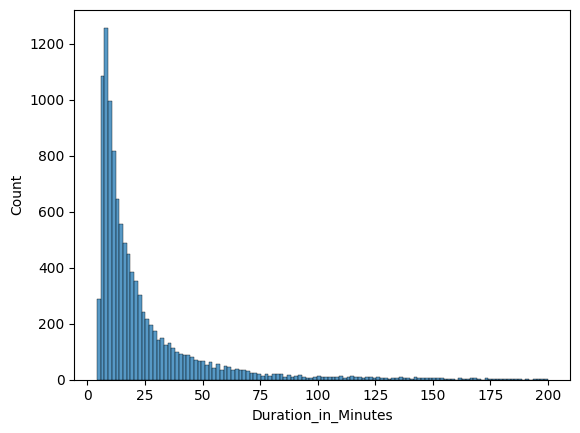

In [11]:
sns.histplot(df_fetch_requests["Duration_in_Minutes"][df_fetch_requests["Duration_in_Minutes"] < 200])

In [33]:
log_minutes = np.log10(df_fetch_requests.Duration_in_Minutes)

Text(0.5, 0, 'Log_10(Duration_in_Minutes)')

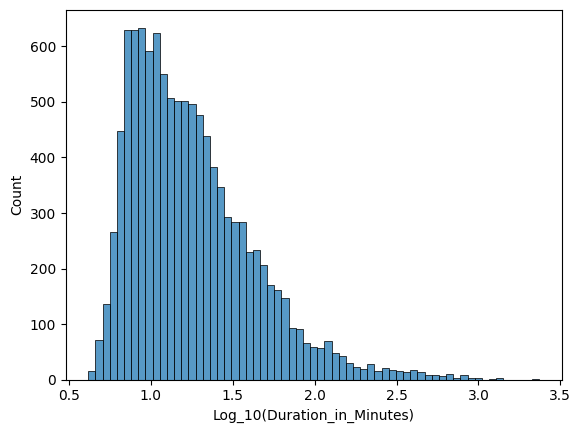

In [35]:
sns.histplot(log_minutes)
plt.xlabel("Log_10(Duration_in_Minutes)")